In [2]:
# mengimpor library
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#import matplotlib.pyplot as plt
#nltk.downloader.download('vader_lexicon')

In [3]:
# Autentikasi
consumerKey = "yo3xDeJbAxM5TTWSryUFalDR2"
consumerSecret = "5cOcpYDmuIFAxSuntuyVCnpxTETAyU0Dpyggx9lcQbuSCb5AAE"
accessToken = "1400338445982003203-1hcHkOFOTDMCa0UxTT3QVqa7zcKz0g"
accessTokenSecret = "jAwlCs3KqBNwgztBJBZ46aQ685WoujmaJSgGnfHpdVbP4"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [87]:
#Analisis Sentimen

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Masukkan kata kunci: ")
noOfTweet = int(input ("Berapa banyak tweet yang akan dianalisa: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positif  = 0
negatif = 0
netral = 0
polarity = 0
tweet_list = []
netral_list = []
negatif_list = []
positif_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negatif_list.append(tweet.text)
        negatif += 1

    elif pos > neg:
        positif_list.append(tweet.text)
        positif += 1
    
    elif pos == neg:
        netral_list.append(tweet.text)
        netral += 1

positif = percentage(positif, noOfTweet)
negatif = percentage(negatif, noOfTweet)
netral = percentage(netral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positif = format(positif, '.1f')
negatif = format(negatif, '.1f')
netral = format(netral, '.1f')
print('selesai')

Masukkan kata kunci: VaksinasiCovid19
Berapa banyak tweet yang akan dianalisa: 1500
selesai


In [88]:
#Jumlah Tweets (Total, Positif, Negatif, Netral)
tweet_list = pd.DataFrame(tweet_list)
netral_list = pd.DataFrame(netral_list)
negatif_list = pd.DataFrame(negatif_list)
positif_list = pd.DataFrame(positif_list)
print("total keseluruhan: ",len(tweet_list))
print("jumlah positif: ",len(positif_list))
print("jumlah negatif: ", len(negatif_list))
print("jumlah netral: ",len(netral_list))

total keseluruhan:  1500
jumlah positif:  69
jumlah negatif:  29
jumlah netral:  1402


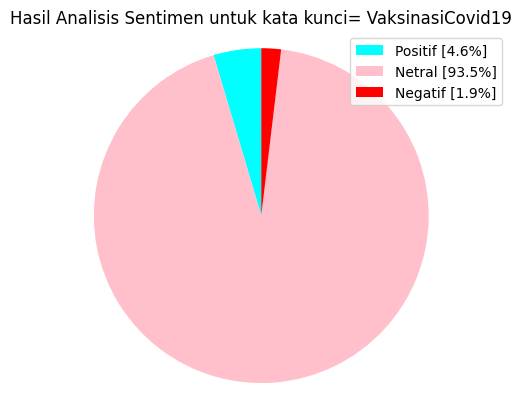

In [89]:
#membuat PieCart
labels = ['Positif ['+str(positif)+'%]' , 'Netral ['+str(netral)+'%]','Negatif ['+str(negatif)+'%]']
sizes = [positif, netral, negatif]
colors = ['aqua','pink','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Hasil Analisis Sentimen untuk kata kunci= "+keyword+"" )
plt.axis('equal')
plt.show()

In [90]:
tweet_list.drop_duplicates(inplace = True)

In [91]:
tw_list = pd.DataFrame(tweet_list)
tw_list["teks"] = tw_list[0]
tw_list

,0,teks
0,Harini aku teman abang istimewa aku cucuk vaks...,Harini aku teman abang istimewa aku cucuk vaks...
1,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...
2,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...
3,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...
4,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...
...,...,...
1495,"Percepat Herd Immunity di masyarakat, Polres M...","Percepat Herd Immunity di masyarakat, Polres M..."
1496,Is there any emrgency call like this in malays...,Is there any emrgency call like this in malays...
1497,#vaksinasicovid19 #kotagorontalo #hulondalo #h...,#vaksinasicovid19 #kotagorontalo #hulondalo #h...
1498,Mari sukseskan vaksinansi gratis dari pemerint...,Mari sukseskan vaksinansi gratis dari pemerint...


In [92]:
tweet_list

,0,teks
0,Harini aku teman abang istimewa aku cucuk vaks...,Harini aku teman abang istimewa aku cucuk vaks...
1,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...
2,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...
3,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...
4,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...
...,...,...
1495,"Percepat Herd Immunity di masyarakat, Polres M...","Percepat Herd Immunity di masyarakat, Polres M..."
1496,Is there any emrgency call like this in malays...,Is there any emrgency call like this in malays...
1497,#vaksinasicovid19 #kotagorontalo #hulondalo #h...,#vaksinasicovid19 #kotagorontalo #hulondalo #h...
1498,Mari sukseskan vaksinansi gratis dari pemerint...,Mari sukseskan vaksinansi gratis dari pemerint...


In [97]:
#Membersihkan Teks (RT, Tanda Baca, dll)

#Membuat kerangka data baru dan fitur baru
tw_list = pd.DataFrame(tweet_list)
tw_list["teks"] = tw_list[0]

#Menghapus RT, Tanda Baca, dll
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["teks"] = tw_list.teks.map(remove_rt).map(rt)
tw_list["teks"] = tw_list.teks.str.lower()
tw_list.head(10)

,0,teks,polaritas,subyektivitas,sentimen,neg,neu,pos,compound
0,Harini aku teman abang istimewa aku cucuk vaks...,harini aku teman abang istimewa aku cucuk vaks...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
1,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...,vaksinasicovid19 vaksincovid19 vaksinasi p...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
2,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...,gratis vaksin covid 19 dosis kedua untuk umum ...,0.000000,0.000000,positif,0.0,0.871,0.129,0.3647
3,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...,tanggapan anggota komisi pemberdayaan ekonomi ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
4,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...,diajeng sasa mengajak teman teman semua iku...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
5,Sebel bgt pas vaksin tadi malah main asal dipo...,sebel bgt pas vaksin tadi malah main asal dipo...,0.166667,0.333333,netral,0.0,1.000,0.000,0.0000
6,RT @MkPLTLDM: ‘Misi Mencapai Imuniti Kelompok’...,misi mencapai imuniti kelompok day3 sekit...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
7,4. Bawa Kartu Kendali. CETAK DAN ISI kartunya ...,4 bawa kartu kendali cetak dan isi kartunya ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
8,4. Bawa Kartu Kendali. CETAK DAN ISI kartunya ...,4 bawa kartu kendali cetak dan isi kartunya ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
9,‘Misi Mencapai Imuniti Kelompok’\n\n#Day3 Seki...,misi mencapai imuniti kelompok day3 sekita...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000


In [98]:
#Menghitung nilai Negatif, Positif, Netral, dan Senyawa

tw_list[['polaritas', 'subyektivitas']] = tw_list['teks'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['teks'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentimen'] = "negatif"
    elif pos > neg:
        tw_list.loc[index, 'sentimen'] = "positif"
    else:
        tw_list.loc[index, 'sentimen'] = "netral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,teks,polaritas,subyektivitas,sentimen,neg,neu,pos,compound
0,Harini aku teman abang istimewa aku cucuk vaks...,harini aku teman abang istimewa aku cucuk vaks...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
1,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...,vaksinasicovid19 vaksincovid19 vaksinasi p...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
2,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...,gratis vaksin covid 19 dosis kedua untuk umum ...,0.000000,0.000000,positif,0.0,0.938,0.062,0.0516
3,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...,tanggapan anggota komisi pemberdayaan ekonomi ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
4,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...,diajeng sasa mengajak teman teman semua iku...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
5,Sebel bgt pas vaksin tadi malah main asal dipo...,sebel bgt pas vaksin tadi malah main asal dipo...,0.083333,0.333333,netral,0.0,1.000,0.000,0.0000
6,RT @MkPLTLDM: ‘Misi Mencapai Imuniti Kelompok’...,misi mencapai imuniti kelompok day3 sekit...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
7,4. Bawa Kartu Kendali. CETAK DAN ISI kartunya ...,4 bawa kartu kendali cetak dan isi kartunya ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
8,4. Bawa Kartu Kendali. CETAK DAN ISI kartunya ...,4 bawa kartu kendali cetak dan isi kartunya ...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000
9,‘Misi Mencapai Imuniti Kelompok’\n\n#Day3 Seki...,misi mencapai imuniti kelompok day3 sekita...,0.000000,0.000000,netral,0.0,1.000,0.000,0.0000


In [100]:
#Membuat bingkai data baru untuk semua sentimen (positif, negatif, dan netral)

tw_list_negative = tw_list[tw_list["sentimen"]=="negatif"]
tw_list_positive = tw_list[tw_list["sentimen"]=="positif"]
tw_list_neutral = tw_list[tw_list["sentimen"]=="netral"]

In [101]:
#Fungsi untuk count_values_in kolom tunggal

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Jumlah','Presentase'])

In [102]:
#Count_values untuk sentimen
count_values_in_column(tw_list,"sentimen")

,Jumlah,Presentase
netral,1088,91.43
positif,69,5.80
negatif,33,2.77


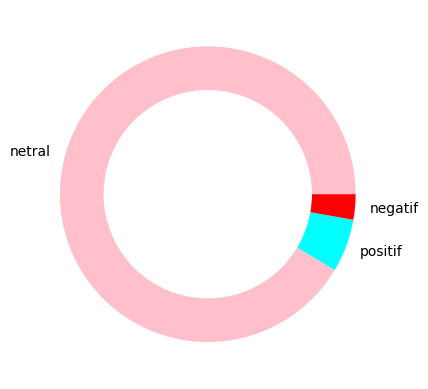

In [160]:
#membuat data untuk Pie Chart
import pc

pichart = count_values_in_column(tw_list,"sentimen")
names= pichart.index
size=pichart["Presentase"]
 
#Buat lingkaran untuk pusat plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['pink','aqua','red'])
#plt.pie(size=[presentase],colors=['pink','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [104]:
#Fungsi untuk Membuat Wordcloud

def create_wordcloud(teks):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_all.png")
    print("Word Cloud berhasil disimpan")
    path="wc_all.png"
    display(Image.open(path))

Word Cloud berhasil disimpan


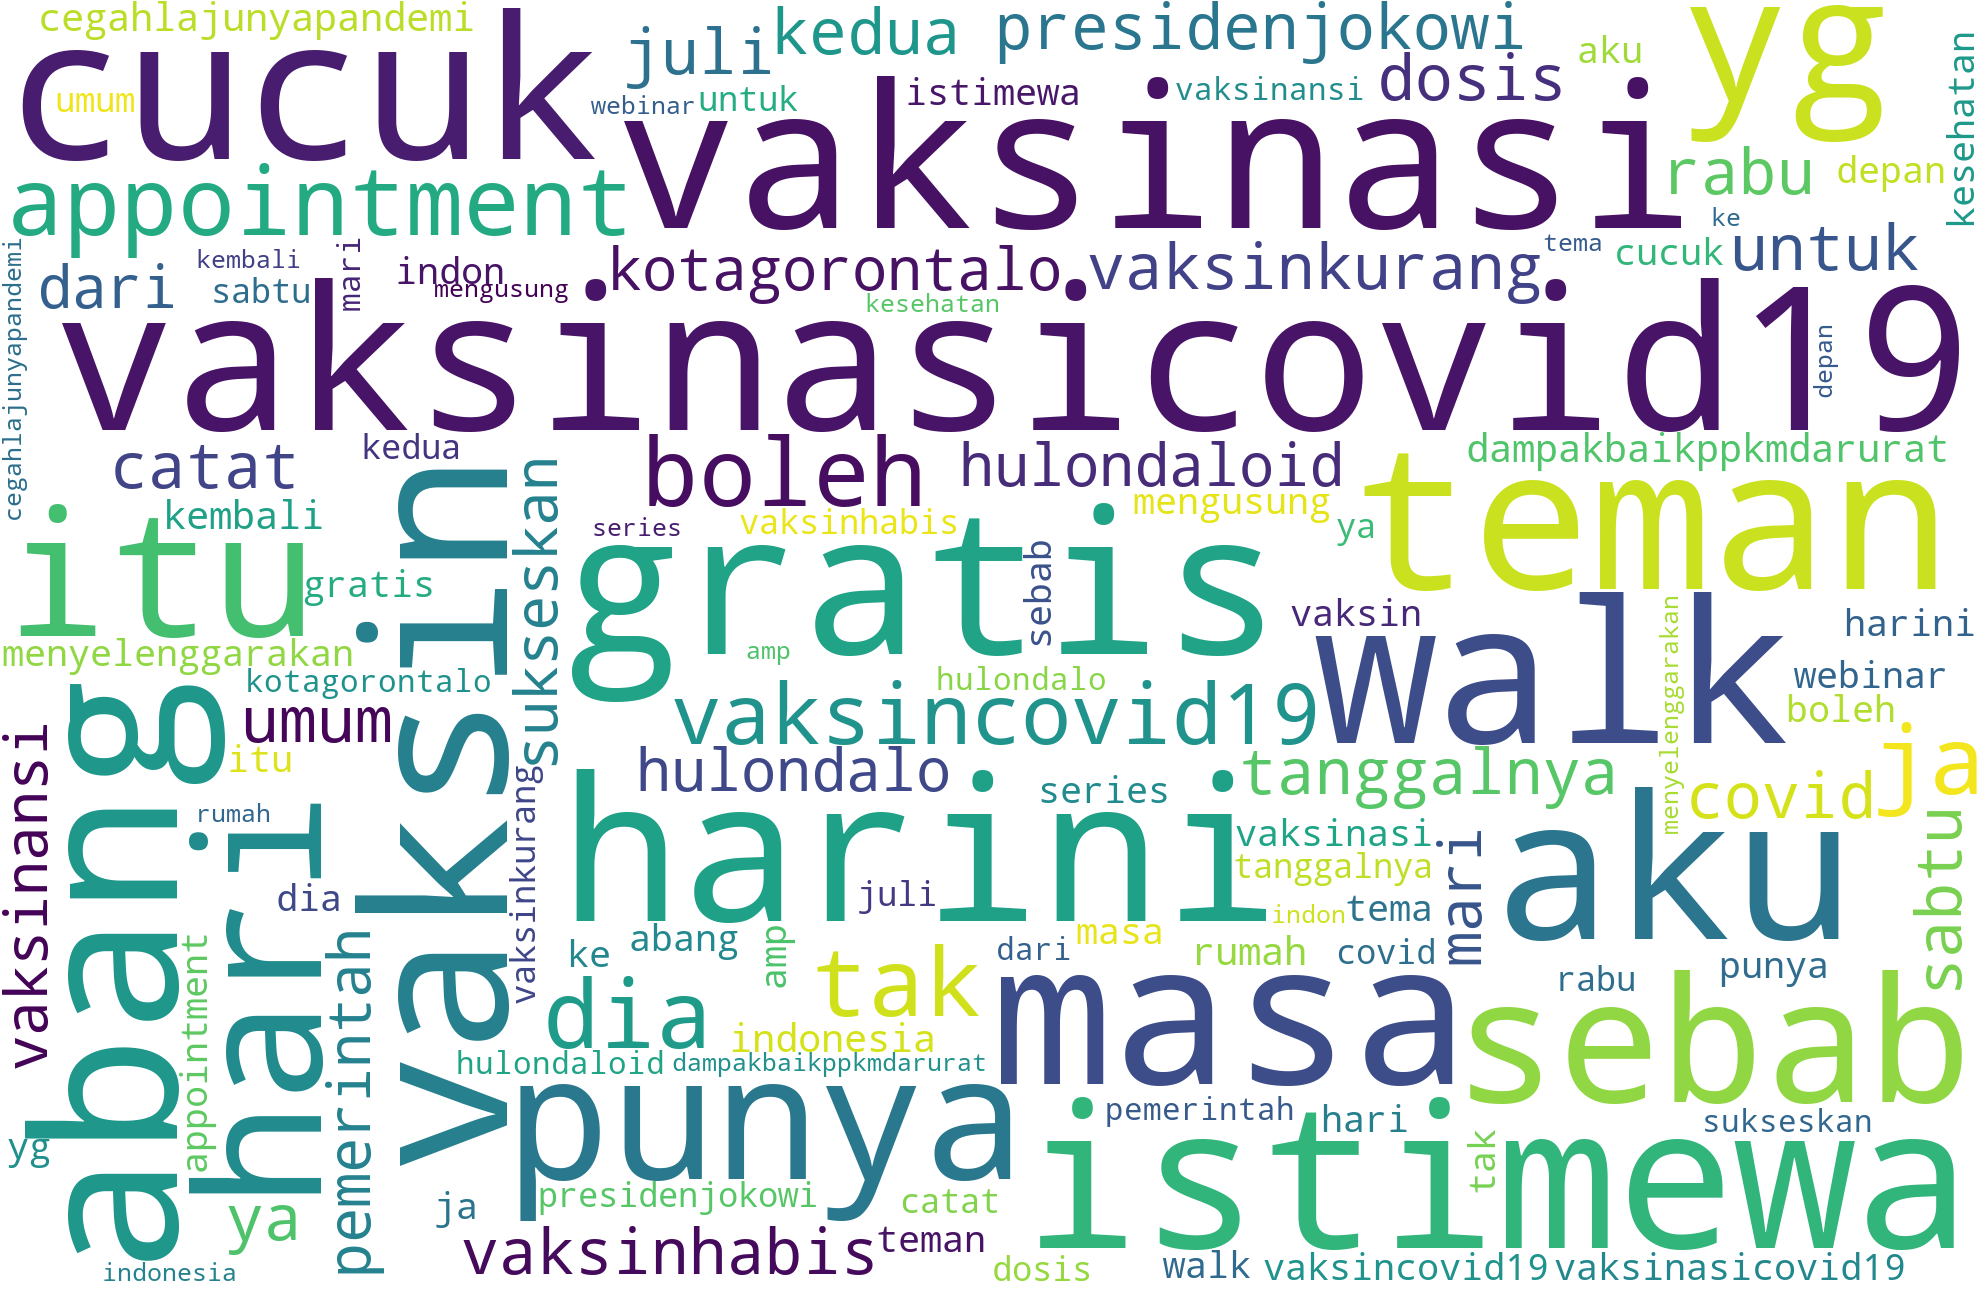

In [105]:
#Membuat wordcloud untuk semua tweets
create_wordcloud(tw_list["teks"].values)

In [109]:
def create_wordcloud(teks):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_positif.png")
    print("Word Cloud berhasil disimpan")
    path="wc_positif.png"
    display(Image.open(path))

Word Cloud berhasil disimpan


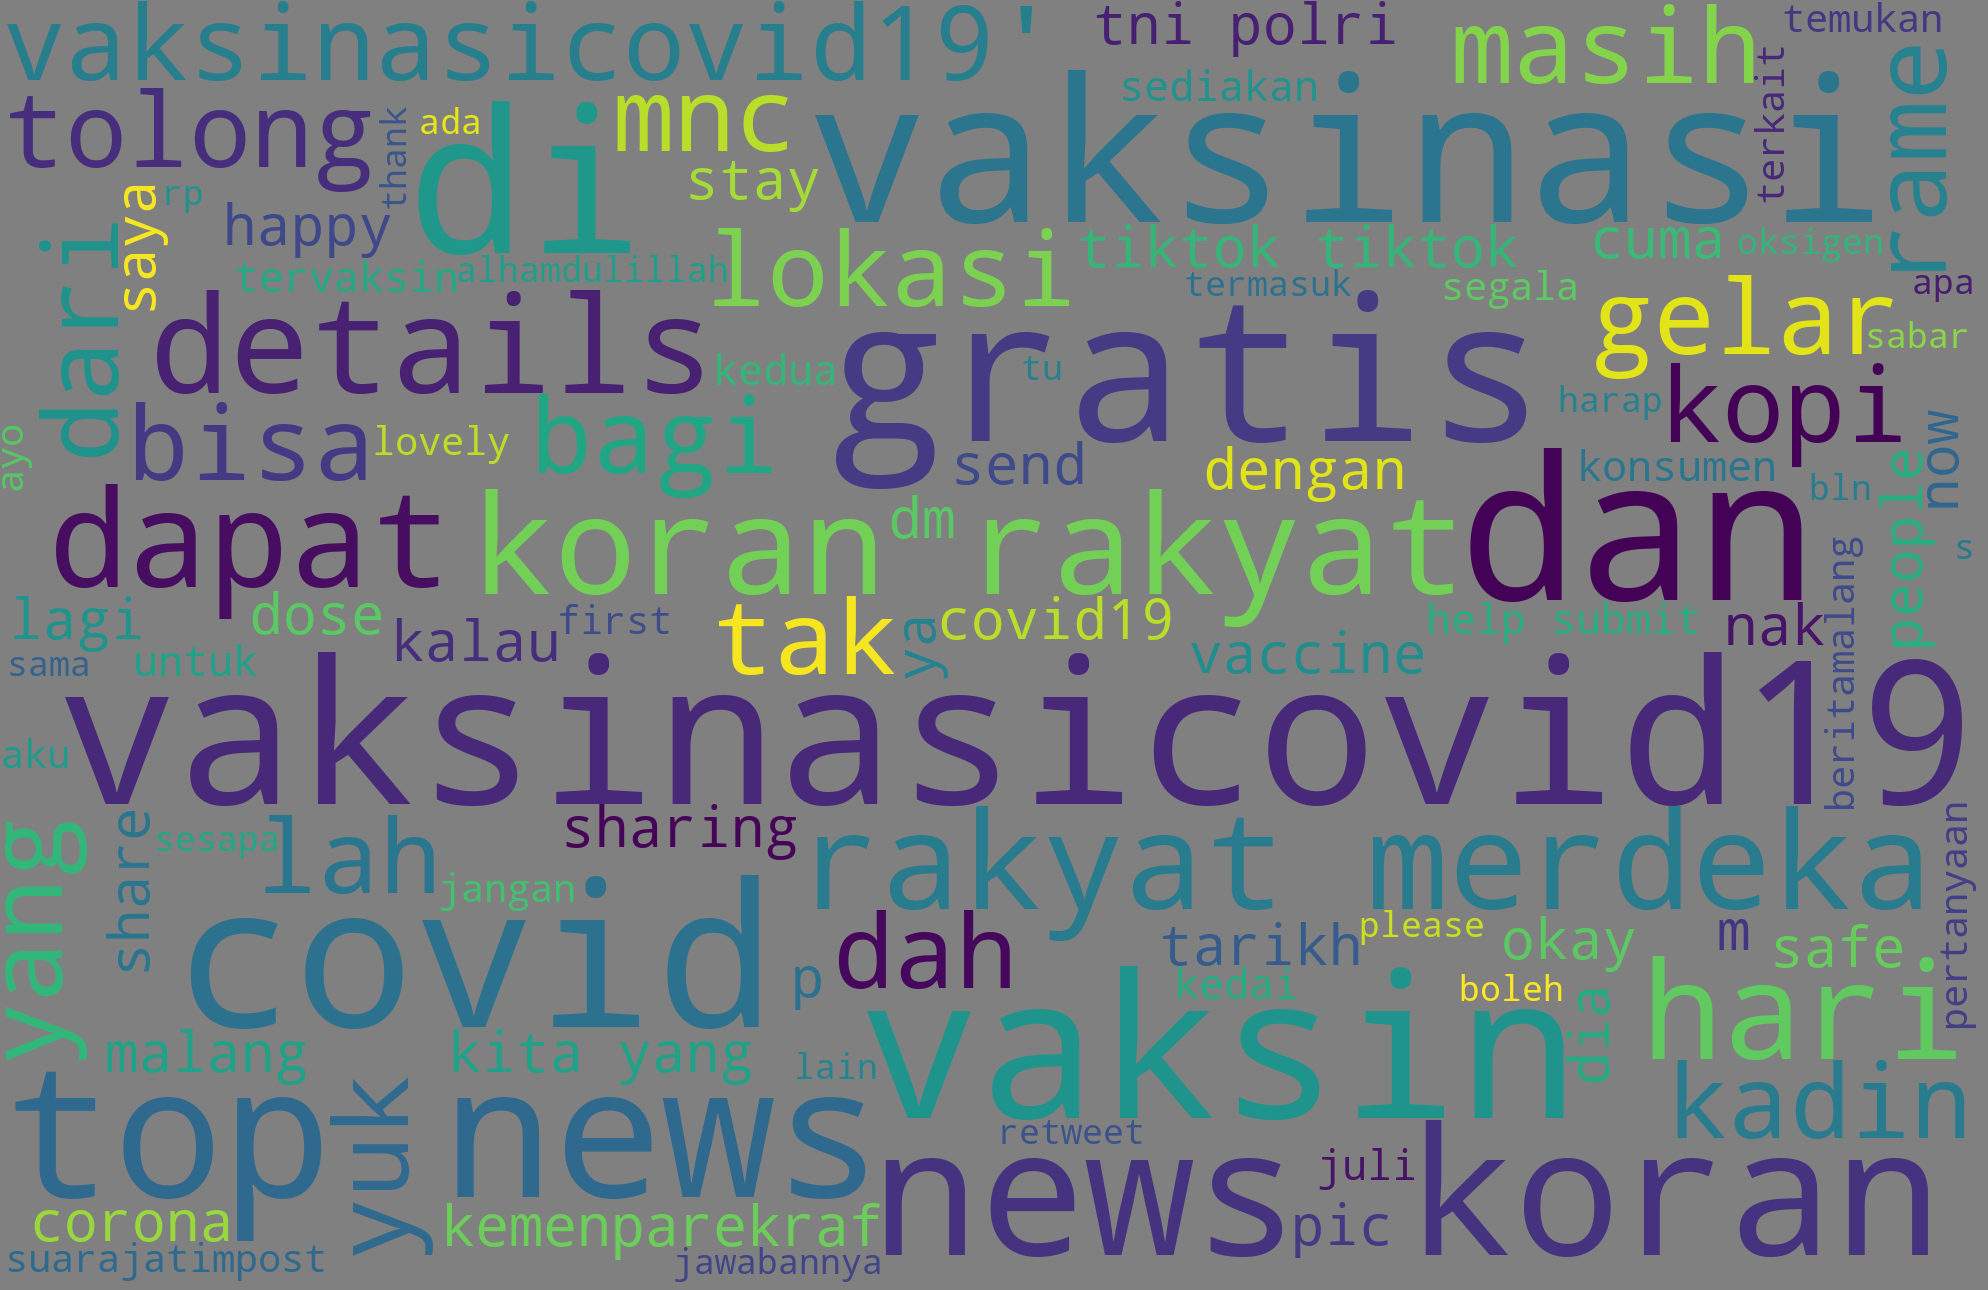

In [115]:
#Membuat wordcloud untuk sentimen positif
create_wordcloud(tw_list_positive["teks"].values)

In [148]:
def create_wordcloud(teks):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(teks))
    wc.to_file("wc_negatif.png")
    print("Word Cloud berhasil disimpan")
    path="wc_negatif.png"
    display(Image.open(path))

Word Cloud berhasil disimpan


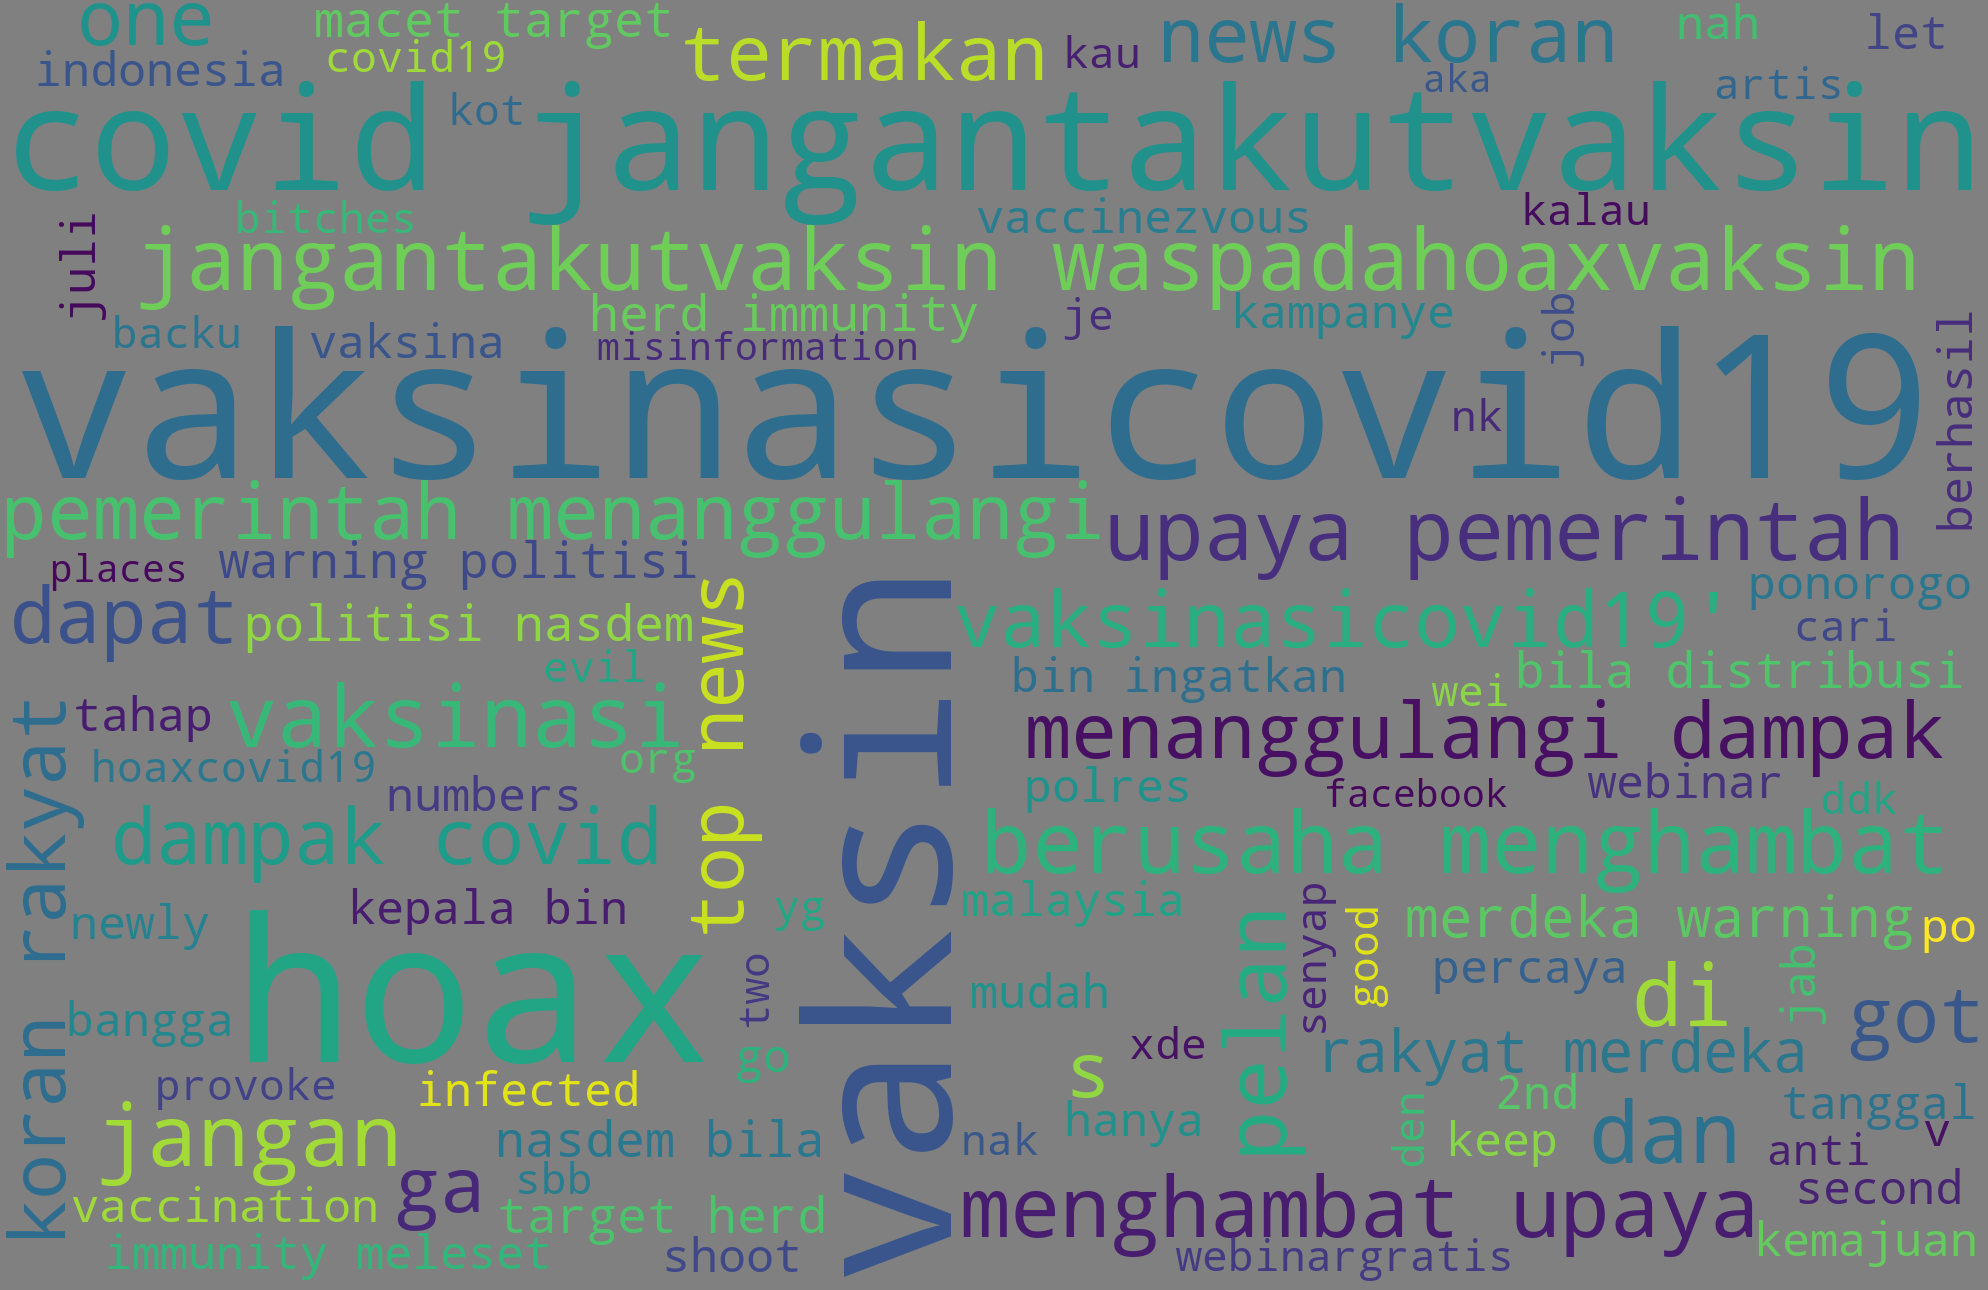

In [150]:
#Membuat wordcloud untuk sentimen negatif
create_wordcloud(tw_list_negative["teks"].values)

In [151]:
def create_wordcloud(teks):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(teks))
    wc.to_file("wc_netral.png")
    print("Word Cloud berhasil disimpan")
    path="wc_netral.png"
    display(Image.open(path))

Word Cloud berhasil disimpan


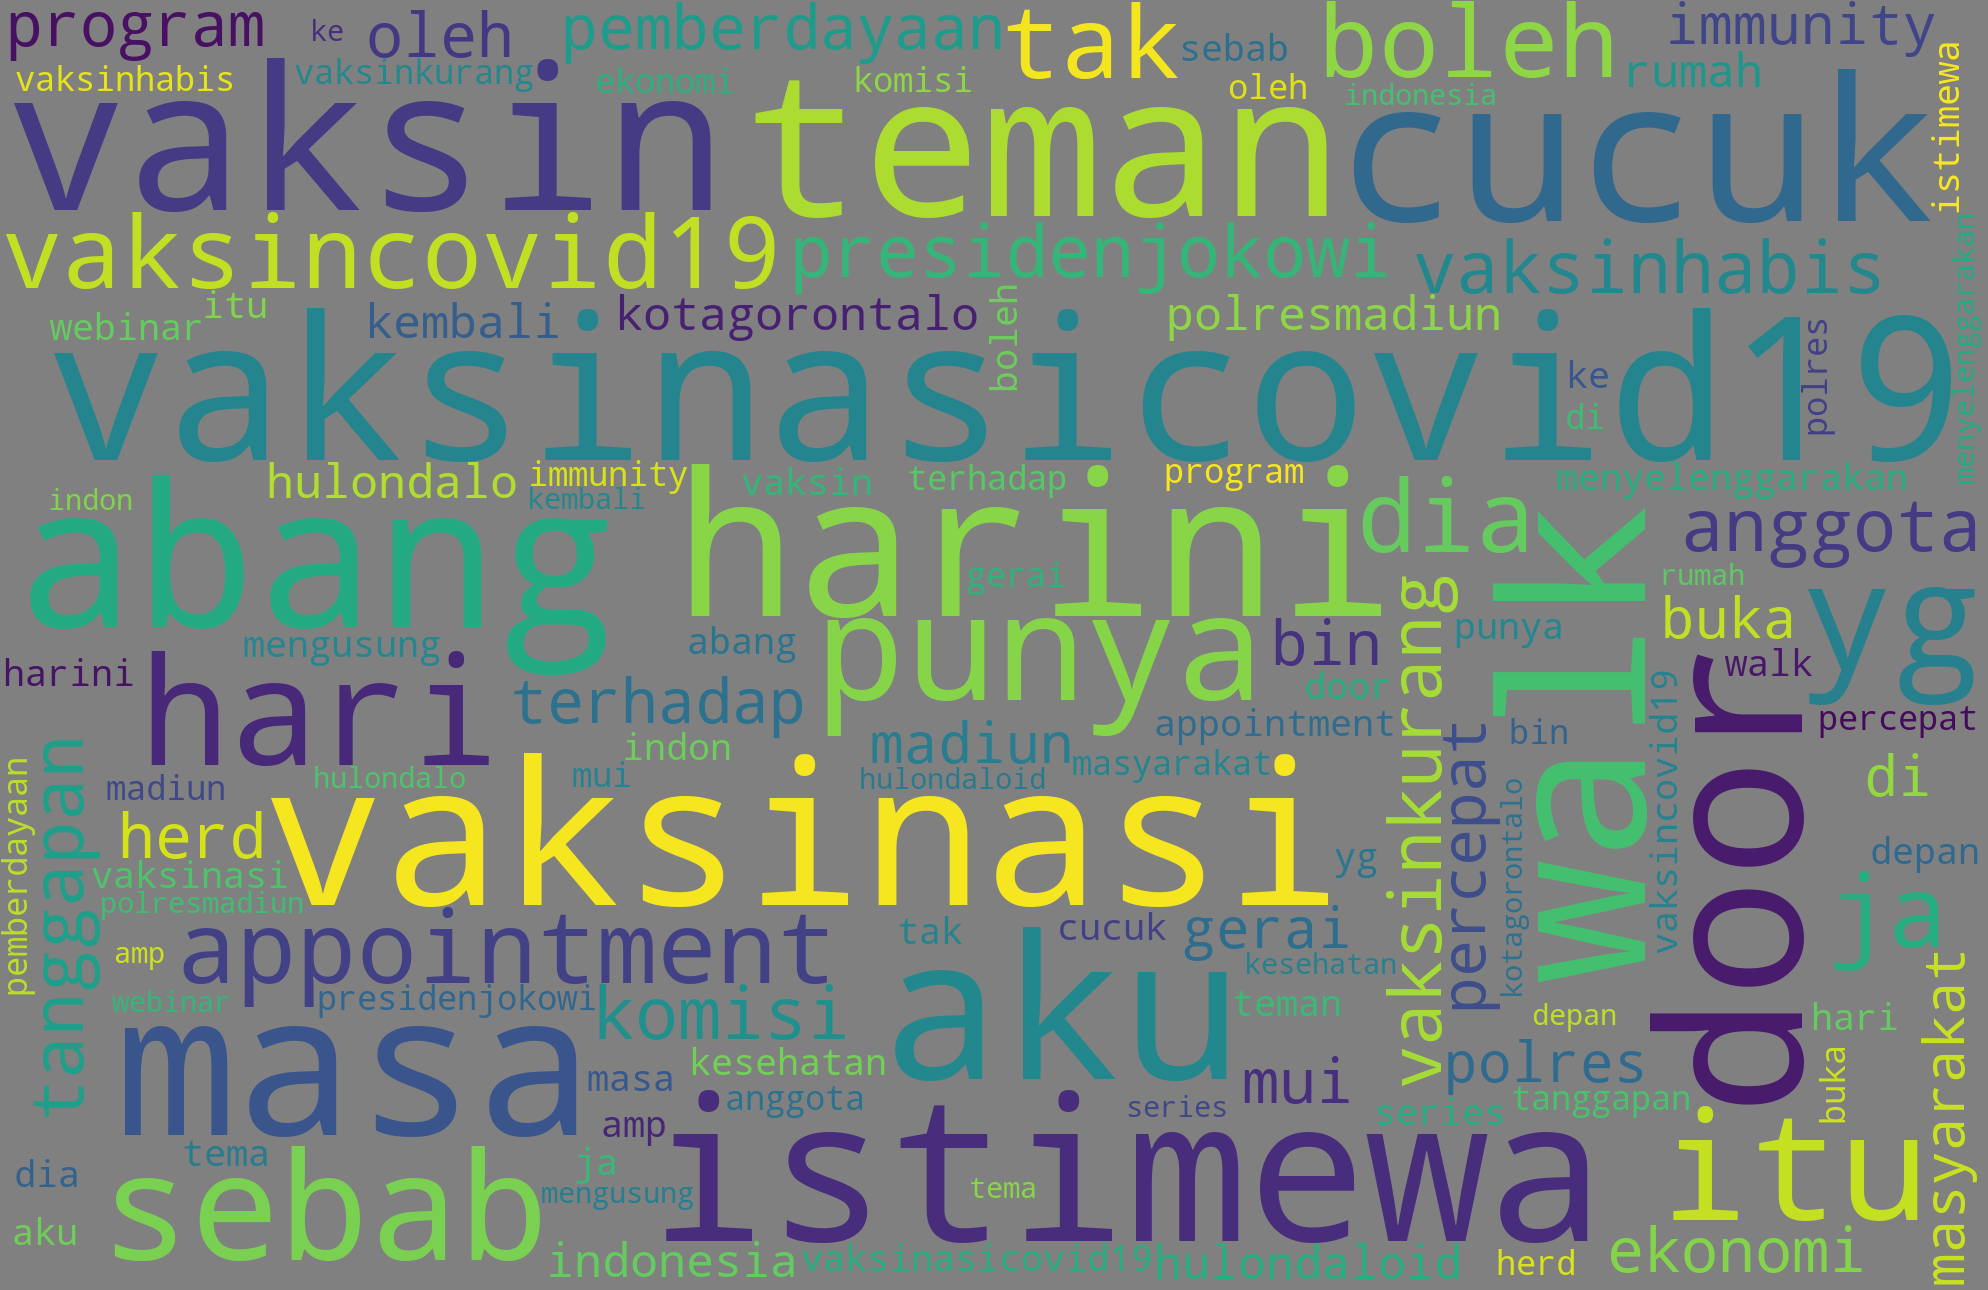

In [152]:
#Membuat wordcloud untuk sentimen netral
create_wordcloud(tw_list_neutral["teks"].values)

In [129]:
#Menghitung panjang tweet dan jumlah kata
tw_list['text_len'] = tw_list['teks'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['teks'].apply(lambda x: len(str(x).split()))

In [130]:
round(pd.DataFrame(tw_list.groupby("sentimen").text_len.mean()),2)

,text_len
sentimen,
negatif,102.73
netral,101.69
positif,106.23


In [131]:
round(pd.DataFrame(tw_list.groupby("sentimen").text_word_count.mean()),2)

,text_word_count
sentimen,
negatif,14.09
netral,12.99
positif,15.09


In [132]:
#Menghapus Tanda Baca
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['teks'].apply(lambda x: remove_punct(x))

In [133]:
#Menerapkan tokenisasi
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [134]:
#Menghapus stopword
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [135]:
#Menerapkan Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [157]:
#Membersihkan Teks
def clean_text(teks):
    teks_lc = "".join([word.lower() for word in teks if word not in string.punctuation]) # hapus tanda baca
    teks_rc = re.sub('[0-9]+', '', teks_lc)
    tokens = re.split('\W+', teks_rc)    # tokenisasi
    teks = [ps.stem(word) for word in tokens if word not in stopword]  # hapus stopword dan stemming
    return teks

In [158]:
tw_list.head()

,0,teks,polaritas,subyektivitas,sentimen,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Harini aku teman abang istimewa aku cucuk vaks...,harini aku teman abang istimewa aku cucuk vaks...,0.0,0.0,netral,0.0,1.000,0.000,0.0000,118,21,harini aku teman abang istimewa aku cucuk vaks...,"[harini, aku, teman, abang, istimewa, aku, cuc...","[harini, aku, teman, abang, istimewa, aku, cuc...","[harini, aku, teman, abang, istimewa, aku, cuc..."
1,#VaksinasiCovid19 #vaksincovid19 #vaksinasi #p...,vaksinasicovid19 vaksincovid19 vaksinasi p...,0.0,0.0,netral,0.0,1.000,0.000,0.0000,91,6,vaksinasicovid vaksincovid vaksinasi presi...,"[, vaksinasicovid, vaksincovid, vaksinasi, pre...","[, vaksinasicovid, vaksincovid, vaksinasi, pre...","[, vaksinasicovid, vaksincovid, vaksinasi, pre..."
2,GRATIS VAKSIN COVID-19 DOSIS KEDUA UNTUK UMUM!...,gratis vaksin covid 19 dosis kedua untuk umum ...,0.0,0.0,positif,0.0,0.938,0.062,0.0516,118,20,gratis vaksin covid dosis kedua untuk umum ...,"[gratis, vaksin, covid, dosis, kedua, untuk, u...","[gratis, vaksin, covid, dosis, kedua, untuk, u...","[grati, vaksin, covid, dosi, kedua, untuk, umu..."
3,Tanggapan Anggota Komisi Pemberdayaan Ekonomi ...,tanggapan anggota komisi pemberdayaan ekonomi ...,0.0,0.0,netral,0.0,1.000,0.000,0.0000,104,14,tanggapan anggota komisi pemberdayaan ekonomi ...,"[tanggapan, anggota, komisi, pemberdayaan, eko...","[tanggapan, anggota, komisi, pemberdayaan, eko...","[tanggapan, anggota, komisi, pemberdayaan, eko..."
4,RT @PoldaJogja: Diajeng Sasa @PDimjengJogja me...,diajeng sasa mengajak teman teman semua iku...,0.0,0.0,netral,0.0,1.000,0.000,0.0000,111,14,diajeng sasa mengajak teman teman semua iku...,"[, diajeng, sasa, mengajak, teman, teman, semu...","[, diajeng, sasa, mengajak, teman, teman, semu...","[, diajeng, sasa, mengajak, teman, teman, semu..."


In [159]:
#Menerapkan Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['teks'])
print('{} Jumlah ulasan memiliki {} kata'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1190 Jumlah ulasan memiliki 3200 kata


In [82]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aal,abah,aban,abang,abi,abubakar,abv,accent,...,yuk,yukvaksin,yunani,yustisi,yuup,z,zahwani,zaki,zendaya,zer
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Kata yang Paling sering Digunakan
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
vaksin,492
vaksinasicovid,472
vaksinasi,414
covid,299
di,274
yang,202
dan,185
untuk,132
xm,117
dengan,114


In [84]:
#Fungsi untuk ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [85]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),5)

n2_bigrams

[('covid 19', 215),
 ('vaksinasi covid', 86),
 ('juli 2021', 61),
 ('gerai vaksin', 57),
 ('vaksin presisi', 56)]

In [86]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),5)

n3_trigrams

[('vaksinasi covid 19', 81),
 ('gerai vaksin presisi', 56),
 ('partisi bilik vaksinasi', 39),
 ('bilik vaksinasi dengan', 39),
 ('vaksinasi dengan berbagai', 39)]